<a href="https://colab.research.google.com/github/MinaGO1/Pathline-task/blob/main/Task_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#importing needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to avoid any warning in the code
pd.set_option('display.max_columns' , None) # Set max columns can be displayed to none to show all columns of our data

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Pathline tasks/laptop_prices.csv') # importing our dataset
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## First look:
> In this section, I will provide my intersets about this data for the first look
- I think I can get screen resolution from screen width and screen height
- Also I can get total storage of the laptop form primary and secondary storages
- I think if I see retina display is by only apple laptops or not
- Also I want to see what the most popular OS in our dataset
- Also I want to see what the company have the light laptops
- What is the most inches of laptops comapany
- Percentage of touch screen laptops
- The most CPU company used
- The most CPU model used for each CPU company
- The most CPU frequency in our data

First thing I want to get screen resolution and total storage

In [65]:
#resolution
df['ScreenRes']= df['ScreenW'].astype(str) + 'x' + df['ScreenH'].astype(str)

In [66]:
df['ScreenRes'].sample(5)

,ScreenRes
211,1920x1080
940,1920x1080
386,1920x1080
937,1920x1080
274,1366x768


Ok now I want to get total storage from primary and secondary storages

In [67]:
df['Storage'] = df['PrimaryStorage'] + df['SecondaryStorage']

In [68]:
df['Storage']

,Storage
0,128
1,128
2,256
3,512
4,256
...,...
1270,128
1271,512
1272,64
1273,1024


In [69]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,ScreenRes,Storage
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,2560x1600,128
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,1440x900,128
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,1920x1080,256
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2880x1800,512
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,2560x1600,256


Ok now I want to order Storage column to be before primary and secondary storages and resolution before screen width and height

In [70]:
columns = list(df.columns)
columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model',
 'ScreenRes',
 'Storage']

In [71]:
(columns.index('PrimaryStorage'),
 columns.index('ScreenW'))

(17, 9)

In [72]:
ordered_Columns= []
for index,col in enumerate(columns):
    """This for loop check if index is screen width or primary storage and put screen resolution and storage columns in this place"""
    if index == columns.index('PrimaryStorage'):
        ordered_Columns.append('Storage')
        ordered_Columns.append('PrimaryStorage')
    elif index == columns.index('ScreenW'):
        ordered_Columns.append('ScreenRes')
        ordered_Columns.append('ScreenW')
    elif col not in ['Storage' ,'ScreenRes' , 'PrimaryStorage']:ordered_Columns.append(col)


In [73]:
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [74]:
df = df[ordered_Columns] #apply our changes

In [75]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1206,HP,15-bs025nv (i5-7200U/8GB/256GB/W10),Notebook,15.6,8,Windows 10,1.91,579.00,Standard,1366x768,1366,768,No,No,No,Intel,2.5,Core i5 7200U,256,256,0,SSD,No,Intel,HD Graphics 620
919,MSI,GL62M 7RD,Gaming,15.6,8,Windows 10,2.20,1119.91,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7300HQ,1152,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050
486,Dell,Precision 3520,Workstation,15.6,16,Windows 10,2.17,2338.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.7,Core i7 6820HQ,512,512,0,SSD,No,Nvidia,Quadro M620
527,Lenovo,IdeaPad 320-15ISK,Notebook,15.6,8,No OS,2.20,459.00,Standard,1366x768,1366,768,No,No,No,Intel,2.0,Core i3 6006U,2048,2048,0,HDD,No,Nvidia,GeForce 920MX
681,Asus,L502NA-GO052T (N3350/4GB/128GB/W10),Notebook,15.6,4,Windows 10,1.86,419.00,Standard,1366x768,1366,768,No,No,No,Intel,1.1,Celeron Dual Core N3350,128,128,0,SSD,No,Intel,HD Graphics 500
73,MSI,GL72M 7RDX,Gaming,17.3,8,Windows 10,2.70,1095.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7300HQ,1152,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050
466,Acer,Aspire 5,Notebook,15.6,4,Windows 10,2.20,469.00,Standard,1366x768,1366,768,No,No,No,Intel,2.0,Core i3 6006U,500,500,0,HDD,No,Nvidia,GeForce GTX 940MX
1232,Dell,Inspiron 3567,Notebook,15.6,8,Windows 10,2.30,469.01,Standard,1366x768,1366,768,Yes,No,No,Intel,2.4,Core i3 7100U,1024,1024,0,HDD,No,Intel,HD Graphics 620
48,Dell,Inspiron 3567,Notebook,15.6,4,Windows 10,2.30,639.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,0,SSD,No,AMD,Radeon R5 M430
509,Lenovo,Legion Y520-15IKBN,Gaming,15.6,8,No OS,2.40,1149.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.8,Core i7 7700HQ,1280,256,1024,SSD,HDD,Nvidia,GeForce GTX 1060


I want also to make new column for secondarystorage If there are or not

In [76]:
# I think I can get our information from secondary storage type and socondary storage
df.loc[df['SecondaryStorage'] == 0].shape[0] # length of all laptops haven't secondary storage

1067

In [77]:
df.loc[df['SecondaryStorageType'] == 'No'].shape[0]
"""That's very good two columns are the same value so I will use secondary storage type column"""

"That's very good two columns are the same value so I will use secondary storage type column"

In [78]:
def secondary_storage(value):
    if value != 'No':return True
    else:return False
df['SecondaryStorage?'] = [secondary_storage(v) for v in df['SecondaryStorageType']]

In [79]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,SecondaryStorage?
315,Dell,Inspiron 5570,Notebook,15.6,8,Windows 10,2.33,844.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.60,Core i5 8250U,1152,128,1024,SSD,HDD,AMD,Radeon 530,True
942,Acer,TravelMate P259-G2,Notebook,15.6,4,Windows 10,2.23,619.0,Standard,1366x768,1366,768,No,No,No,Intel,2.50,Core i5 7200U,500,500,0,HDD,No,Intel,HD Graphics 620,False
122,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,8,No OS,2.20,629.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.50,Core i5 7200U,256,256,0,SSD,No,Nvidia,GeForce 940MX,False
1124,Asus,VivoBook Max,Notebook,15.6,4,Windows 10,2.00,435.0,Standard,1366x768,1366,768,No,No,No,Intel,2.40,Core i3 7100U,1024,1024,0,HDD,No,Intel,HD Graphics 620,False
1143,HP,ZBook 15,Workstation,15.6,8,Windows 7,2.59,2229.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.60,Core i7 6700HQ,256,256,0,SSD,No,Nvidia,Quadro M1000M,False
929,HP,ProBook 640,Notebook,14.0,4,Windows 10,1.95,1149.0,Standard,1366x768,1366,768,No,No,No,Intel,2.30,Core i5 6200U,500,500,0,HDD,No,Intel,HD Graphics 520,False
203,Lenovo,Legion Y720-15IKB,Gaming,15.6,16,Windows 10,3.20,1749.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.80,Core i7 7700HQ,1536,512,1024,SSD,HDD,Nvidia,GeForce GTX 1060,True
587,Lenovo,Thinkpad T460s,Ultrabook,14.0,12,Windows 10,1.40,1673.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.60,Core i7 6600U,256,256,0,SSD,No,Intel,HD Graphics 520,False
174,HP,ProBook 470,Notebook,17.3,8,Windows 10,2.50,923.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.60,Core i5 8250U,256,256,0,SSD,No,Nvidia,GeForce 930MX,False
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,4,Android,0.69,319.0,Standard,1920x1200,1920,1200,Yes,Yes,No,Intel,1.44,Atom x5-Z8550,64,64,0,Flash Storage,No,Intel,HD Graphics 400,False


ok now I want to order primary storage type to be before primary storage and secondary storage ? to be before primary storage type

In [80]:
ordered_Columns = []
columns = df.columns.to_list()
for i , col in enumerate(columns):
    """In this for loop I'm ordered some storage columns"""
    if i == columns.index('SecondaryStorage'):ordered_Columns.append('PrimaryStorageType') ; \
        ordered_Columns.append('SecondaryStorage?'); \
        ordered_Columns.append('SecondaryStorage')
    elif col not in ['SecondaryStorage?' , 'PrimaryStorageType']:ordered_Columns.append(col)
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'PrimaryStorageType',
 'SecondaryStorage?',
 'SecondaryStorage',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

that's awesome

In [81]:
df = df[ordered_Columns]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [83]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
113,HP,Probook 440,Notebook,14.0,4,Windows 10,1.63,722.00,Standard,1366x768,1366,768,No,Yes,No,Intel,1.6,Core i5 8250U,500,500,HDD,False,0,No,Intel,UHD Graphics 620
1216,Acer,E5 774G,Notebook,17.3,4,Windows 10,3.30,598.00,Standard,1600x900,1600,900,No,No,No,Intel,2.0,Core i3 6006U,1024,1024,HDD,False,0,No,Nvidia,GeForce 940MX
1121,HP,Spectre Pro,Notebook,13.3,8,Windows 10,1.16,1690.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.3,Core i5 6200U,256,256,SSD,False,0,No,Intel,HD Graphics 520
172,Lenovo,IdeaPad 320-15AST,Notebook,15.6,4,No OS,2.20,309.00,Standard,1366x768,1366,768,No,No,No,AMD,2.9,A6-Series 9220,500,500,HDD,False,0,No,AMD,Radeon R4 Graphics
647,Razer,Blade Pro,Gaming,14.0,16,Windows 10,1.95,2599.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,256,256,SSD,False,0,No,Nvidia,GeForce GTX 1060
919,MSI,GL62M 7RD,Gaming,15.6,8,Windows 10,2.20,1119.91,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7300HQ,1152,128,SSD,True,1024,HDD,Nvidia,GeForce GTX 1050
871,Lenovo,IdeaPad 110-15ISK,Notebook,15.6,4,No OS,2.20,479.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.0,Core i3 6006U,1024,1024,HDD,False,0,No,AMD,Radeon R5 M430
817,HP,Chromebook 11,Netbook,11.6,4,Chrome OS,1.23,385.00,Standard,1366x768,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3060,16,16,Flash Storage,False,0,No,Intel,HD Graphics 400
883,Lenovo,IdeaPad 510-15ISK,Notebook,15.6,8,Windows 10,2.20,669.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.5,Core i7 6500U,1024,1024,HDD,False,0,No,Nvidia,GeForce 940MX
456,Dell,Alienware 17,Notebook,17.3,8,Windows 10,4.42,2046.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.7,Core i7 7700HQ,1024,1024,HDD,False,0,No,Nvidia,GeForce GTX 1060


Ok now let's strat with EDA

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [85]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


ok Firstly I want to see count of laptops for each comapny

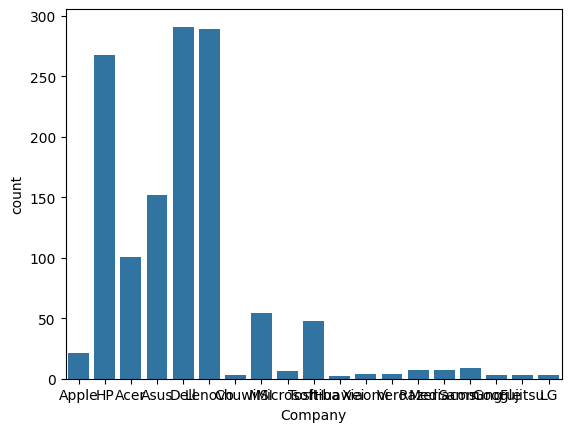

In [86]:
sns.countplot(x='Company' , data=df);
plt.show()

Ok there are overplotting so I should handle that by sorting only most 10 companies

In [87]:
top_10_companies = df['Company'].value_counts(sort=True , ascending=False).head(10)
top_10_companies# Ok that's good

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


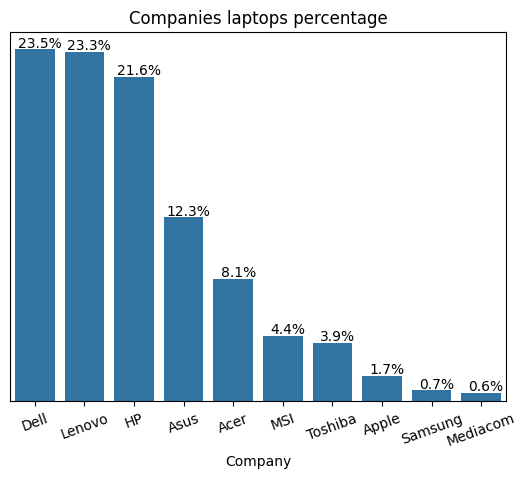

In [88]:
ax = sns.barplot(x=top_10_companies.index, y=top_10_companies.values)
for p in ax.patches:
    plt.text(p.get_x()+.5, p.get_height()+2 , # x , y
             str(
                 round(
                    (int(p.get_height()) / top_10_companies.sum())*100
                    ,1)
                )
             +'%',#percentage
            horizontalalignment='center' # centerting text
            )
plt.xticks(rotation=20)
ax.yaxis.set_visible(False)
plt.title('Companies laptops percentage')
plt.show()


In this chart we also see the percentage are very similiar in top 2 so I can say Dell and Lenovo are the most two companies make laptops in our data and we also see there are big difference between top 1 and top 10 so I think I should use mean in any column to get good result

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [90]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


now I want to see type name column

In [91]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

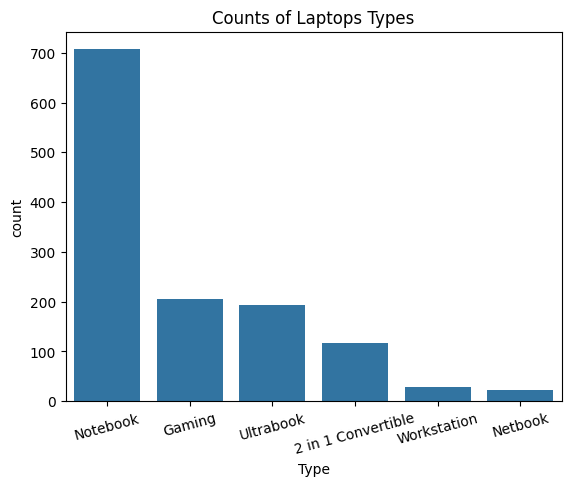

In [92]:
sns.countplot(x='TypeName' , data=df,
              order=df['TypeName'].value_counts(ascending=False, sort=True).index)
plt.xticks(rotation = 15)
plt.title('Counts of Laptops Types')
plt.xlabel('Type')
plt.show()

In this chart notebook laptops are the famouse one in our data with big difference between it and top 2(gaming) and Gaming and ultrabook are almost similiar and also workstation and netbook are very rare in our data, 2 in 1 laptops(laptops that can you convert it to tablet)

> Ok I want to plot disterbution of inches

In [93]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

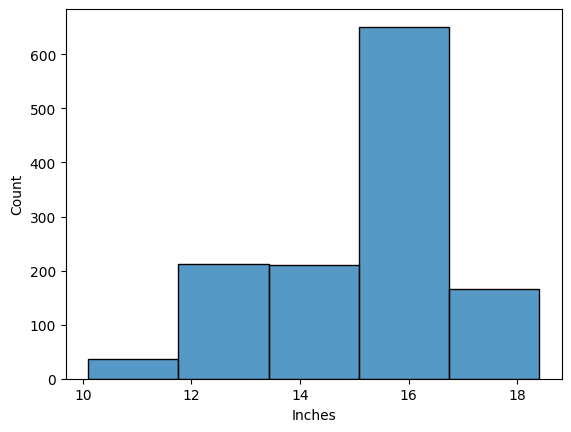

In [94]:
sns.histplot(x='Inches' , data=df, bins=5)
plt.show()

In this chart I decreased number of bins to be 5 because of smaller range of inches,

we also see 15-17 inch are the most famous
14 and 12 are very similiar to each other

> now I want to see range of inches mean

In [95]:
inches_means = []
for _ in range(10_000):
    bootsample = df['Inches'].sample(320 , replace=True)
    inches_means.append(bootsample.mean())

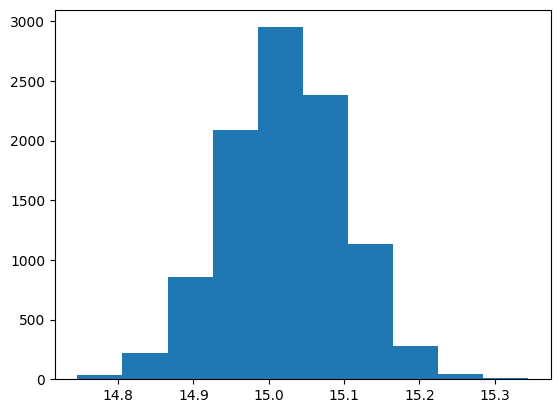

In [96]:
plt.hist(inches_means);
plt.show()

Ok so I will make 95% confidence level in my confidence interval

In [97]:
round(np.percentile(inches_means , 2.5),1) , round(np.percentile(inches_means , 97.5),1)

(np.float64(14.9), np.float64(15.2))

so 95% Inches mean is between 14.9 - 15.2 inch

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [99]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


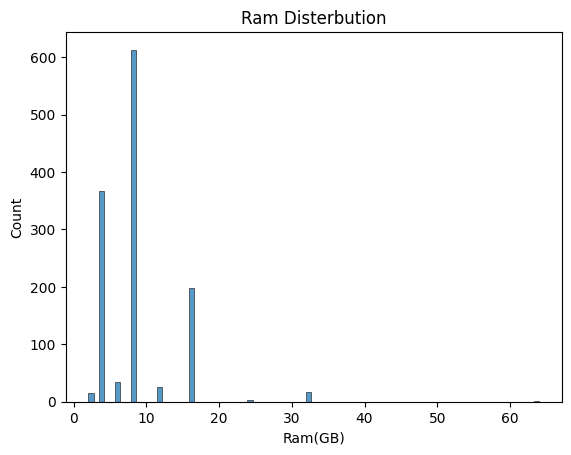

In [100]:
#Plotting Ram disterbution
sns.histplot(x='Ram' , data=df);
plt.title('Ram Disterbution');
plt.xlabel('Ram(GB)');

> I want to decrease bins to be between **0** - **20** GB
- To see more information about our disterbution

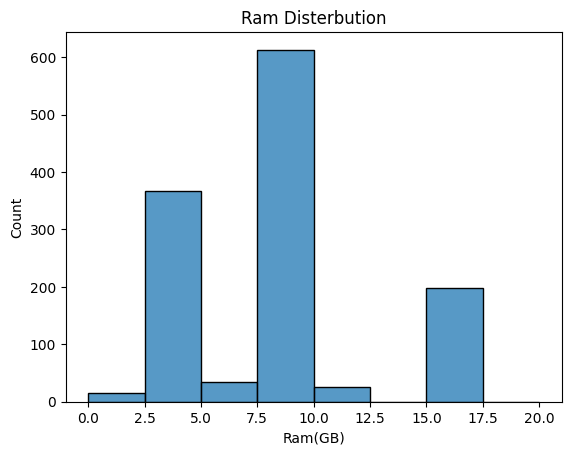

In [101]:
#Making bins
bins = np.arange(0,22.5,2.5)
#Plotting Ram disterbution
sns.histplot(x='Ram' , data=df , bins=bins);
plt.title('Ram Disterbution');
plt.xlabel('Ram(GB)');

### In this chart:
- Most common ram is between **7.5** - **10** GB. In my opinion That's mean 8 GB Ram is most common ram used in laptops
- Mean common ram is between **2.5** - **5.0** GB. In my opinion That's mean 4 GB Ram is mean common ram used in laptops
- Third common ram is betwen **15** - **17.5**. That's mean mean 16 GB is third most common ram used in laptops
- I think reason to be 8 GB is the most common Ram is almost laptops are notebook laptops and notebook laptops arn't need large rams to work well. It needs only 8 GB Ram
- I think only workstaion and gaming laptops needes 16 GB ram or above like 64 GB ram to work well

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [103]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


- Now I want to see Primary storage vs Secondary storage

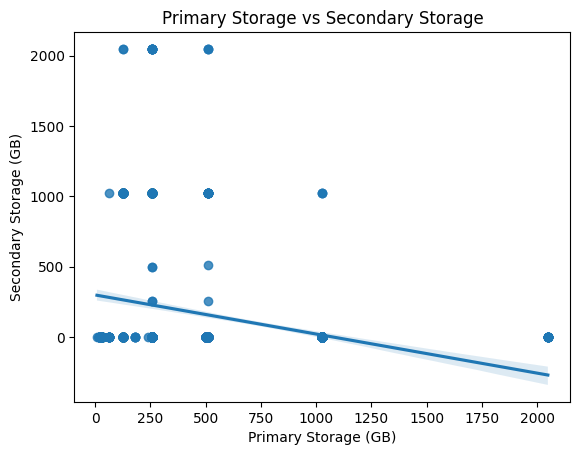

In [104]:
sns.regplot(x='PrimaryStorage',y='SecondaryStorage' ,data=df); # fitting line in our scatterplot
plt.title('Primary Storage vs Secondary Storage');
plt.xlabel('Primary Storage (GB)');
plt.ylabel('Secondary Storage (GB)');

### In this chart:
- I see visually. There are moderate relationship between them,
- This relationship is negative like we see on this line that's means if one of them increased, anthor one will decreased.
- There are many points on 0 of secondary storage that's because there arn't secondary storage in these laptops,
- But most of these laptops have large primary storage.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [106]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


In [107]:
cpu_df = df.drop('Company' , axis=1).rename(columns={'CPU_company':'Company'})[['Company']] #Dropping company column to add company column of CPUs
cpu_df['Product'] = 'CPU'
gpu_df = df.drop('Company' , axis=1).rename(columns={'GPU_company':'Company'})[['Company']]
gpu_df['Product'] = 'GPU'
cpu_gpu_data = pd.concat([cpu_df , gpu_df])
#This cell to split cpu companies and gpu companies and add hue to our countplot

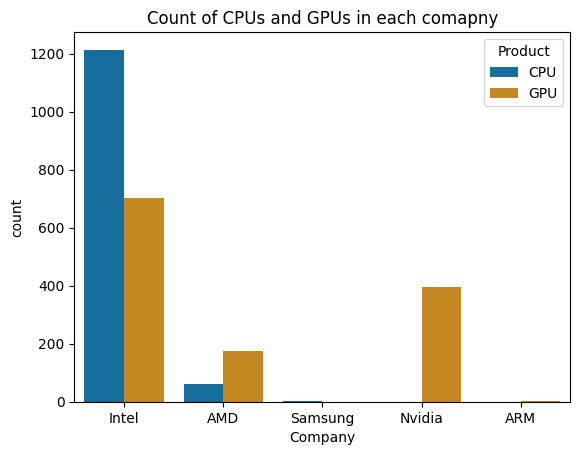

In [108]:
sns.countplot(x='Company' , hue='Product' , data=cpu_gpu_data , palette='colorblind');
plt.title('Count of CPUs and GPUs in each comapny');

### In this chart:
- Intel has a strong hold over both CPUs and GPUs
> I think that's becuase Intel have many CPUs and internal GPUs so I think that's the reason
- Nividia also has a strong hold over on GPUs
> Nividia should be top 1 in external GPUs, so it is top 2 in our data
- AMD has a medium hold over both CPUs and GPUs
- Samsung and ARM arn't almost in our data

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [110]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


- I will see storage disterbution but with hue

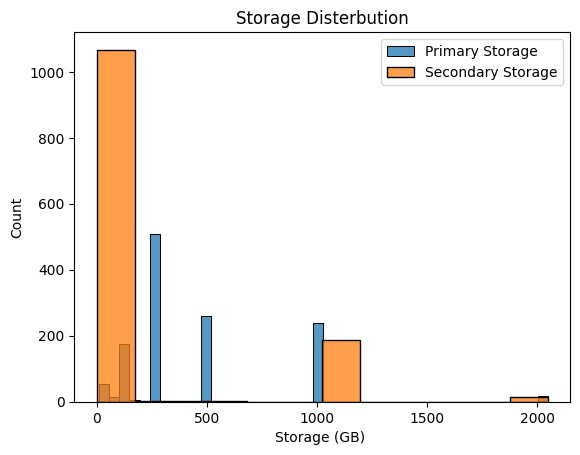

In [111]:
sns.histplot(x='PrimaryStorage' , data=df);
sns.histplot(x='SecondaryStorage' ,data=df);
plt.title('Storage Disterbution');
plt.xlabel('Storage (GB) ');
plt.legend(['Primary Storage' , 'Secondary Storage']);

> Ok I will zoom in between **0** - **500**, then **1000** - **2000**

In [112]:
#Making a function for this chart to avoid repeated code
def storage_chart(bins):
    """
    parms: bins: array or list of bins for hist plot
    This function plot storage disterbution using bins paramater
    first hist plot is for primary storage
    second hist plot is for secondary storage
    return: Hist plot for storage
    """
    sns.histplot(x='PrimaryStorage' , data=df , bins=bins);
    sns.histplot(x='SecondaryStorage' ,data=df , bins=bins);
    plt.title('Storage Disterbution');
    plt.xlabel('Storage (GB)');
    plt.legend(['Primary Storage' , 'Secondary Storage']);

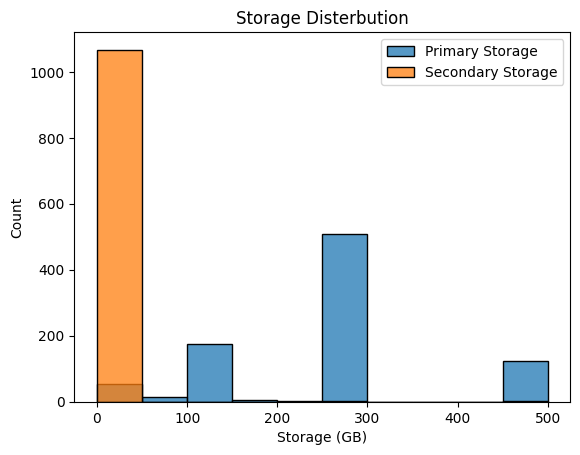

In [113]:
bins = np.arange(0,550,50)
storage_chart(bins)

### In this chart:
- Most common secondary storage is between 0 and 50 GB
> That's expected because seondary storage is only of storing important files or some apps
- Most common primary storage is between 250 and 300 GB
> I think this scope (0 - 500 GB) for notebook laptops not for workstaion or gaming laptops
- mean common priamy storage is between 100 and 150 GB
> I think most commont storage in this scope (100 - 150 GB) in primary storage is 128 GB

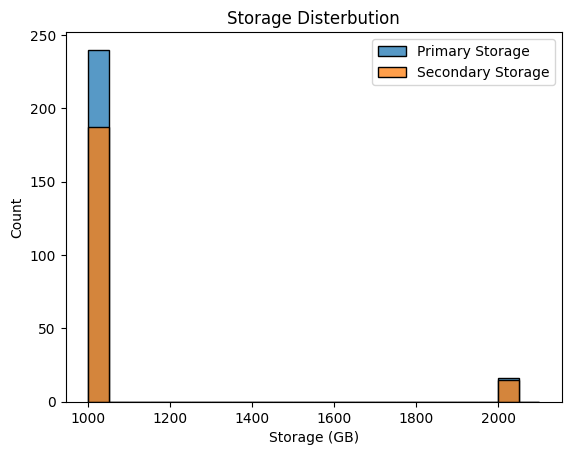

In [114]:
storage_chart(np.arange(1000,2150,50)) # I set bins 1000 and 2100 because 2000 is empty

### In this chart:
- Most common primary and secondary storage is between **1000** and **almost 1050** GB
> This scope for gaming and workstation laptops for expensive laptops
- there some outlires values between 2000 and 2100 GB
> This scope for very high performance laptops and this scope is very rare in our data and our world and this scope is very very expensive

In [115]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [117]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


Ok I want to make hypothesis to check there are difference between mean of **Dell** Rams and **Lenovo** Rams because They are the top 2

$$H_0 : \mu_{Dell_R} - \mu_{Lenovo_R} \leq 0$$
$$H_1 : \mu_{Dell_R} - \mu_{Lenovo_R} \gt 0$$

In [118]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [120]:
(df.query('Company == "Dell"')['Ram'].mean(), # mean rams of Dell
    df.query('Company == "Lenovo"')['Ram'].mean()) # mean rams of Lenovo

(np.float64(9.230240549828178), np.float64(8.055363321799309))

In [121]:
df.shape[0]

1275

In [ ]:
# Now I will get dell and lenovo rows to make bootstrap
